# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

In [2]:
df = pd.read_csv("../../data/checkins.csv.gz",compression='gzip')

In [3]:
df.shape

(100000, 2)

In [4]:
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [6]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

Инфо [Потоки в Python](https://webdevblog.ru/vvedenie-v-potoki-v-python/)

In [7]:
ms = MeanShift(bandwidth=0.1)

In [8]:
%%time
ms.fit(df)

CPU times: user 4min 28s, sys: 243 ms, total: 4min 28s
Wall time: 4min 28s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [9]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [10]:
print('clusters: {}'.format(len(cluster_centers)))

clusters: 3231


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Добавлю координаты офисов в массив
offices = np.array([[33.751277, -118.188740],
           [25.867736, -80.324116], 
           [51.503016, -0.075479],
           [52.378894, 4.885084],
           [39.366487, 117.036146],
           [-33.868457, 151.20513]])

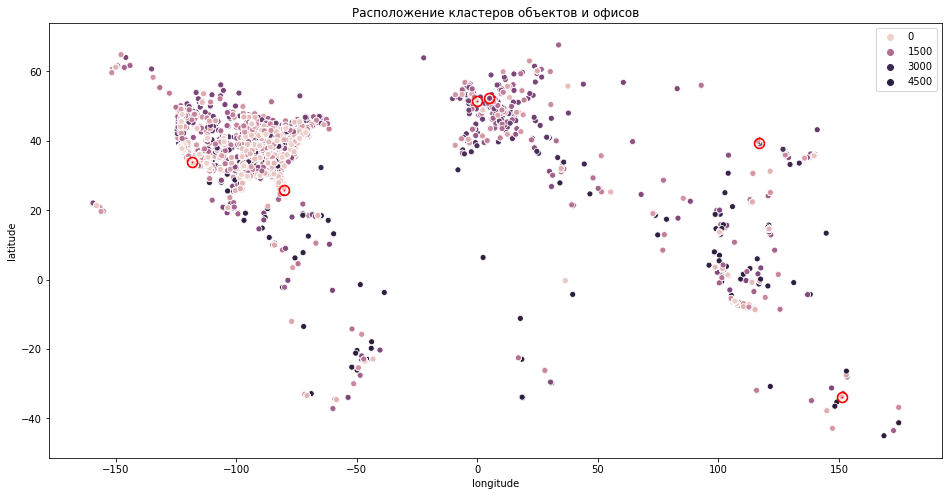

In [13]:
plt.figure(figsize=(16,8)) 
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
sns.scatterplot(data = df, x='longitude', y='latitude', hue=labels)

#Добавить центры кластеров
#plt.scatter(cluster_centers[:,1],cluster_centers[:,0],marker = ".",color = 'g', s = 10, linewidths = 2, zorder = 10)
plt.title('Расположение кластеров объектов и офисов')
plt.show()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

Инфо [itertools](https://all-python.ru/osnovy/itertools.html)

In [ ]:
#! Разобраться с itertools.groupby

In [ ]:
from itertools import groupby

2 вариант:

In [19]:
df['cluster'] = labels

In [64]:
df_gt15 = df.groupby('cluster').filter(lambda x: len(x)>15)

In [65]:
df_gt15.groupby('cluster')['cluster'].unique().count()

592

In [22]:
df_gt15.shape

(90862, 3)

In [23]:
df.shape

(100000, 3)

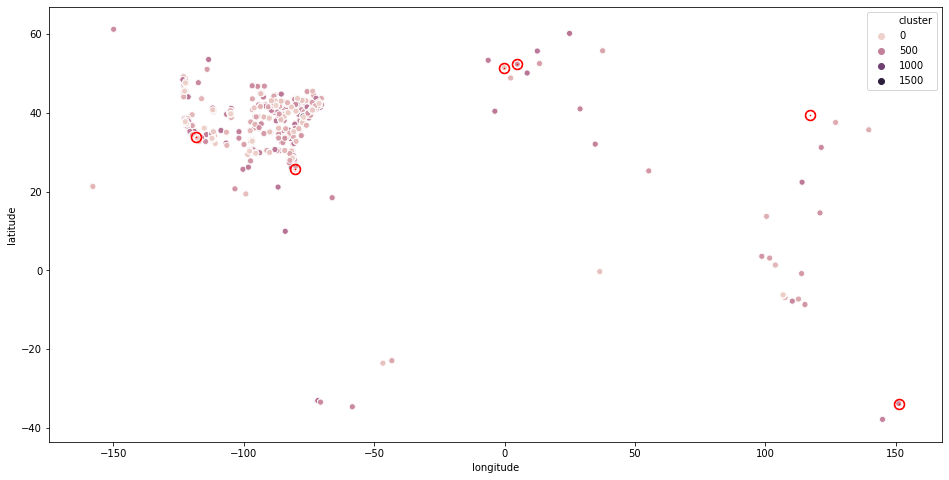

In [24]:
plt.figure(figsize=(16,8)) 
#Добавить офисы
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
#Добавить точки
sns.scatterplot(data = df_gt15, y='latitude',x='longitude', hue='cluster')

#Добавить центры кластеров
#for l in df_gt15['lcluster'].unique():
#    plt.scatter(cluster_centers[l-1:l,1],cluster_centers[l-1:l,0],marker = ".",color = 'g', s = 10, linewidths = 1, zorder = 10)
plt.show()

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

Добавлю координаты отфильтрованных центров кластеров в dataframe

In [66]:
df_gt15['cc_latitude'] = df_gt15['cluster'].apply(lambda c: cluster_centers[c][0])

In [67]:
df_gt15['cc_longitude'] = df_gt15['cluster'].apply(lambda c: cluster_centers[c][1])

In [72]:
#Считаю евклидово расстояние от офисов до всех координат и записываю в df_15 в новые столцы
offices_name = ['Los Angeles','Miami','London','Amsterdam','Beijing','Sydney']
for i in range(6):
    df_gt15['point_to_{}'.format(offices_name[i])] = ((offices[i][0] - df_gt15['latitude'][i])**2 +\
                                              (offices[i][1] - df_gt15['longitude'][i])**2\
                                             )**0.5
    df_gt15['cc_to_{}'.format(offices_name[i])] = ((offices[i][0] - df_gt15['cc_latitude'][i])**2 +\
                                              (offices[i][1] - df_gt15['cc_longitude'][i])**2\
                                             )**0.5

In [80]:
df_gt15.sort_values(by=['point_to_Los Angeles']).head(20)

,latitude,longitude,cluster,cc_latitude,cc_longitude,point_to_Los Angeles,cc_to_Los Angeles,point_to_Miami,cc_to_Miami,point_to_London,cc_to_London,point_to_Amsterdam,cc_to_Amsterdam,point_to_Beijing,cc_to_Beijing,point_to_Sydney,cc_to_Sydney
0,38.895112,-77.036366,5,38.886165,-77.048783,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66740,33.800745,-84.410520,7,33.766636,-84.393289,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66738,40.740389,-73.983385,0,40.717716,-73.991835,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66737,36.768209,-76.287493,186,36.811582,-76.284589,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66736,40.650000,-73.950000,0,40.717716,-73.991835,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66735,44.827745,-92.943822,202,44.886975,-92.970318,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66734,34.051490,-84.071300,290,34.077502,-84.046490,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66733,33.415184,-111.831472,6,33.357345,-111.822654,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66732,32.948179,-96.729720,91,33.011823,-96.701587,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483
66741,40.771940,-73.930560,0,40.717716,-73.991835,41.472605,41.459174,8.923639,8.885426,122.746461,122.746533,117.365741,117.357777,229.186605,229.114704,270.334783,270.33483


In [76]:
df_gt15.sort_values(by=['cc_to_Los Angeles'])['cc_to_Los Angeles'].head(20)

0        41.459174
66740    41.459174
66738    41.459174
66737    41.459174
66736    41.459174
66735    41.459174
66734    41.459174
66733    41.459174
66732    41.459174
66741    41.459174
66731    41.459174
66729    41.459174
66728    41.459174
66726    41.459174
66725    41.459174
66724    41.459174
66723    41.459174
66721    41.459174
66719    41.459174
66730    41.459174
Name: cc_to_Los Angeles, dtype: float64

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)` если считаете через geopy, либо `(-33.86063043, 151.20477593)` если считаете с евклидовой метрикой. Если у вас не так, то считайте, что вы сделали что-то неправильно. 